# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 2020006507
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 2020085547


## Introdução

Neste notebook, foi implementado um algoritmo de Aprendizado de Máquina Supervisionado, ou seja, um algoritmo que, recebendo um determinado conjunto ou uma determinada base de dados, o algoritmo é capaz de aprender as características de diferentes amostras, permitindo-o classificar amostras desconhecidas em dois grupos. Outrossim, as tarefas do algoritmo são as seguintes:

* Dado um conjunto, separar uma porcentagem das tarefas para treinamento do modelo
* Estando o modelo treinado, a porcentagem restante é utilizada para poder validar o funcionamento do modelo, verificando se a capacidade de separação das amostras é válida.
* Concluídas ambas estas etapas e validado o modelo, o mesmo estará pronto para receber amostras aleatórias daqueles dados, de modo a classificá-las com certa acurácia.

In [1]:
# Importando Módulos para Funcionamento
import matplotlib.pyplot as plt
from random import randint, shuffle

from modules.functions import *
from modules.model import *

import pandas as pd
import numpy as np


In [2]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['lines.linewidth'] = 4


def despine(ax):
  # Hiding spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # Setting
  ax.yaxis.set_ticks_position('left')
  ax.xaxis.set_ticks_position('bottom')


## Classes
Foram declaradas as seguintes classes para uso nos algoritmos:

### Dot

Representa um ponto 2D que contem operações de '+', '-', '=' e  '<'.

O principal uso desta classe esta na ordenação dos pontos pela coordenada polar, necessário para o algoritmo de Graham.

No algoritmo de ordenação dos pontos ela coordenada polar: Após encontrar o âncora, utilizamos o operador '-' para centralizar o âncora na origem e todos os outros pontos em relação ao novo âncora. Isso porque o operador '<' tem como referência a origem (que agora é o ponto âncora). Após ordenar todos os pontos em relação ao âncora, voltamos os pontos para suas posições iniciais com o operador '+'.


### Endpoint

Representa um evento no algoritmo de varredura linear.

Esta classe contem uma representação do ponto (x, y), um índice que referencia um segmento em um array de segmentos (i.e. qual segmento o evento pertence) e se o evento é "ponto a esquerda" ou "ponto a direita".

Além disso, foi implementado o oprador de '<' para a ordenação dos eventos em relação ao eixo-x. Com critério de desempate: eixo-y, tipo de evento.

O operadofoi implementado para verificar se dois eventos estão no mesmo lugar no plano cartesiano e  pertencem a mesma semirreta. '=' .... SAMUEL



### Segment

Representa um segmento no algoritmo de varredura linear.

Essa classe tem dois pontos e um rótulo que referencia a envoltória que o segmento pertence.

O operador = foi necessario, para a saida de segmentos da arvore no algoritmo da Varredura.

## Descrição dos Algoritmos

### Graham

Foi utilizado o algoritmo de Graham clássico para cálculo da envoltória convexa.

A preferência deste algoritmo é devido a sua estabilidade em relação a entrada e saída. Por exemplo, o algoritmo de Gift Wraping tem complexidade de tempo O(h*n) em que h é a quantidade de segmentos da envoltória, logo ele é preferível quando o número de segmentos da envoltória é proximo de log(n), em seu pior caso Gift Wraping é O(n²). Por isso optamos pela estabilidade do Graham.

Graham tem complexidade de O( n*log(n)) que é o custo de ordenar uma lista de pontos pela coordenada polar.

### Varredura Linear

O algoritmo de varredura linear foi utilizado para verificação de intercessão entre as envoltórias. Ou seja, caso duas envoltórias/classes não tenham intercessão, elas serão linearmente separáveis, logo é possível criar uma reta que separa as classes que será nosso classificador.

O algoritmo recebe uma lista ordenada de eventos e uma lista de segmentos, ambas representam as duas envoltórias.

O algoritmo de Varredura foi adaptado para o problema de intercessão de envoltórias. O problema era: dois segmentos consecultivos de uma envoltória se cruzam, logo criamos duas AVLs para garantir que será contado intercessão apenas em envoltórias diferentes. **SAMU**

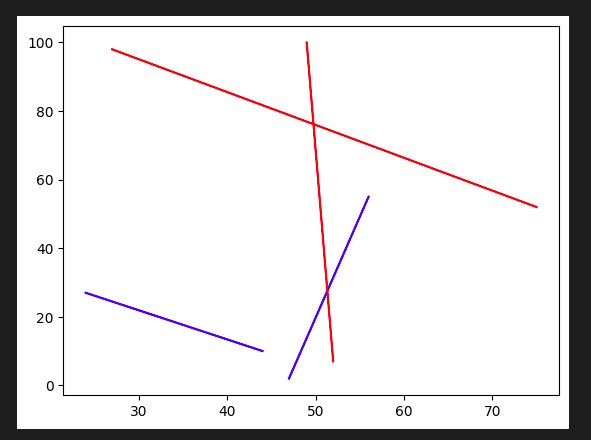

In [3]:
from IPython import display
display.Image("./images/img1.png")

### Modelo Ingênuo

Uma vez que as classes são separáveis, operamos da seguinte maneira:

1- Encontramos o menor segmento entre vértices das duas envoltórias, utilizando força bruta O(n²).

2- Encontramos a mediatriz da semirreta do passo 1. Para isso, foi necessário o cálculo do coeficiente angular desta mediatriz. O(1)

O modelo retorna a menor semirreta entre as envoltórias, mediatriz (reta que separa as envoltórias), e um valor boolena que diz se a primeira envoltória passada como argumento está a esquerda da mediatriz.

## Classificador

Uma vez que temos a semirreta que separa as envoltórias (i.e. nosso modelo), basta verificar para um novo ponto se ele realiza uma curva a esqueda, a direita ou é colinear. A depender do tipo de curva é atribuido um rótulo de classe para o ponto. Essa etapa é O(n) pois atribuimos classes para cada ponto de teste.

## Bancos de Dados

Falta realizar

colocar as legendas no grafico

    - Quais são as classes das Envoltorias

    - Qual é a equação da reta

### Banana

#### Carrega o banco de dados

In [4]:
banana = pd.read_csv('./data/banana.csv', delimiter=',')

Class = [1, -1]

X_train, X_test, y_train, y_test = test_train(banana, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das Envoltorias

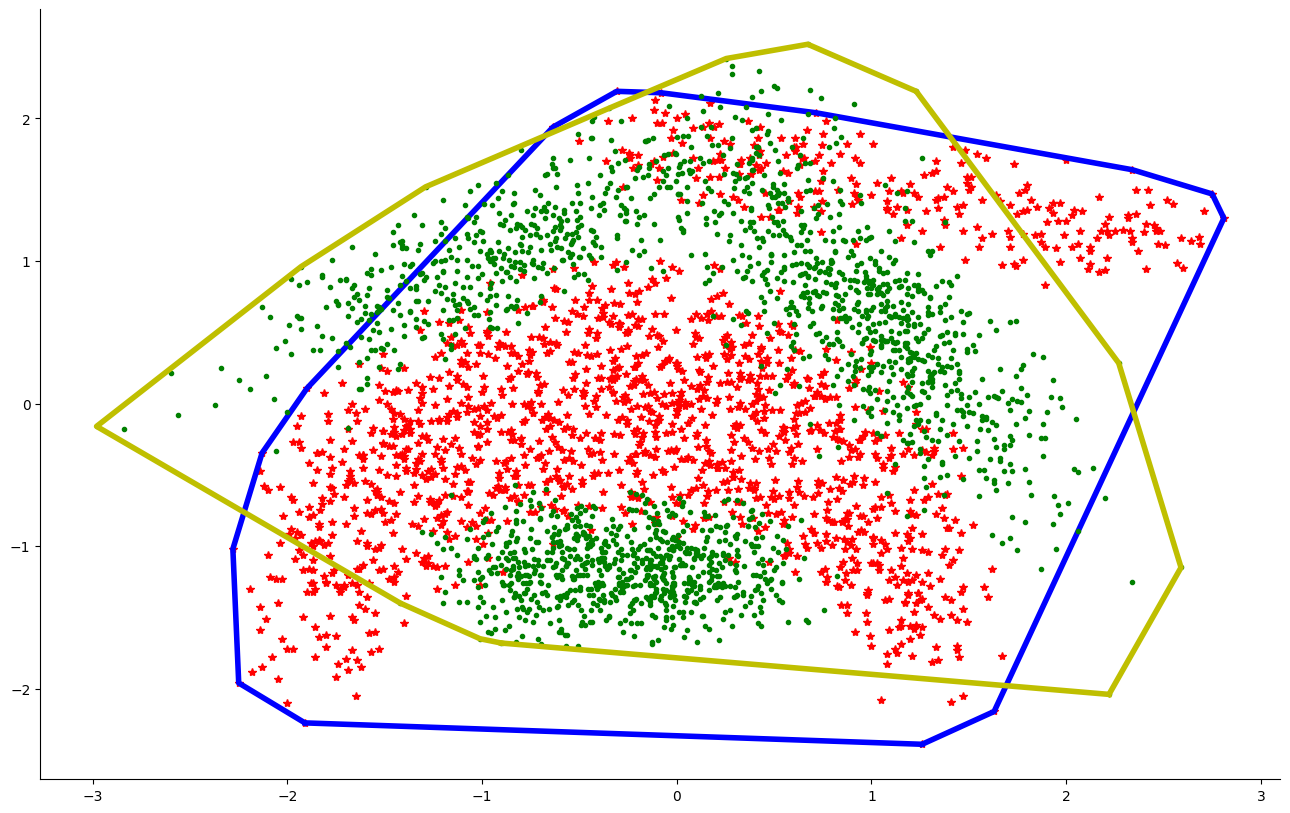

In [5]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)
despine(ax)
plt.show()

#### Analise de Separabilidade

In [6]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {hasIntersection}')

As envoltórias tem interssão: True


### Thyroid

#### Carrega o bando de dados e Separa em treino e teste

In [7]:
thyroid = pd.read_csv('./data/thyroid.csv', delimiter=',')
thyroid = thyroid[['TSH', 'FTI', 'Class']]

Class = [1, 2]

X_train, X_test, y_train, y_test = test_train(thyroid, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das envoltorias

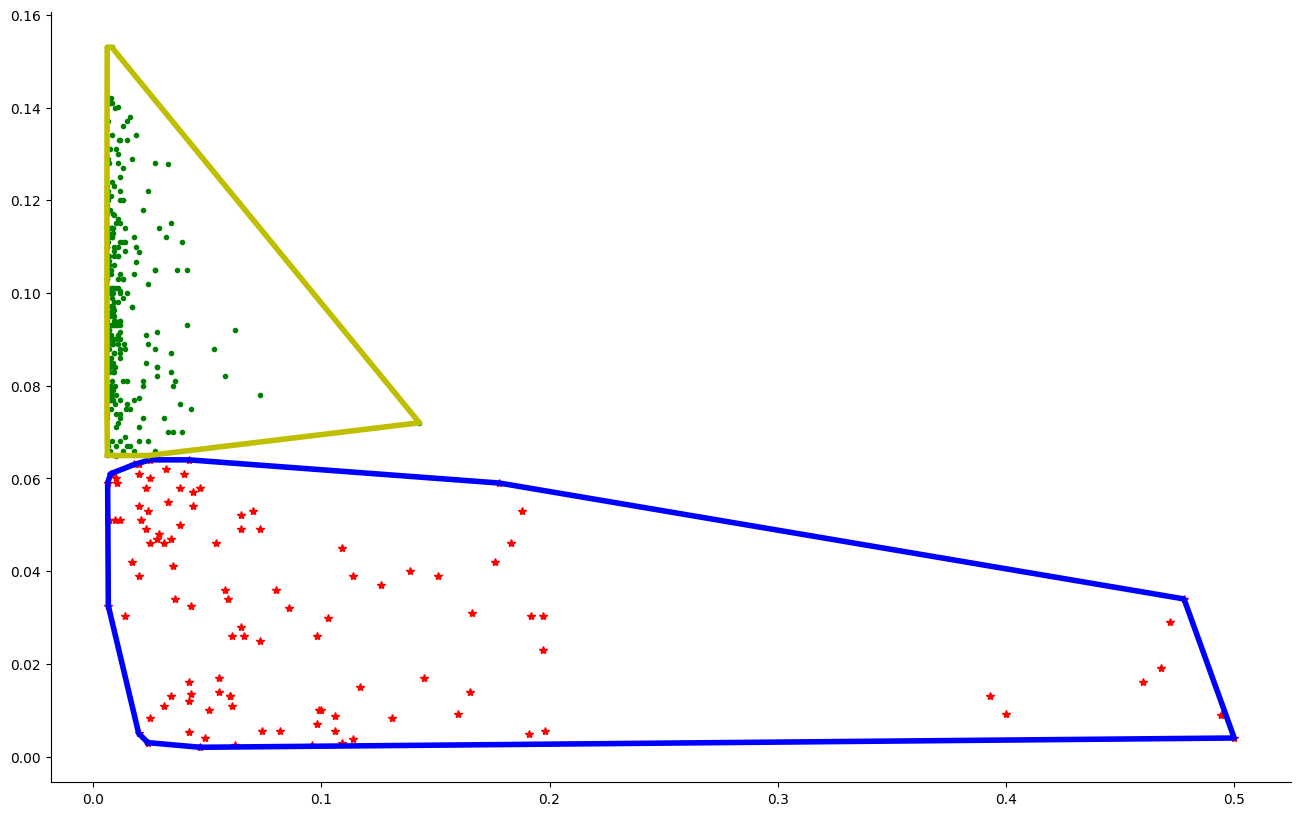

In [8]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)

despine(ax)

plt.show()

#### Analise de separabilidade

In [9]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {hasIntersection}')


As envoltórias tem interssão: False


#### Modelo

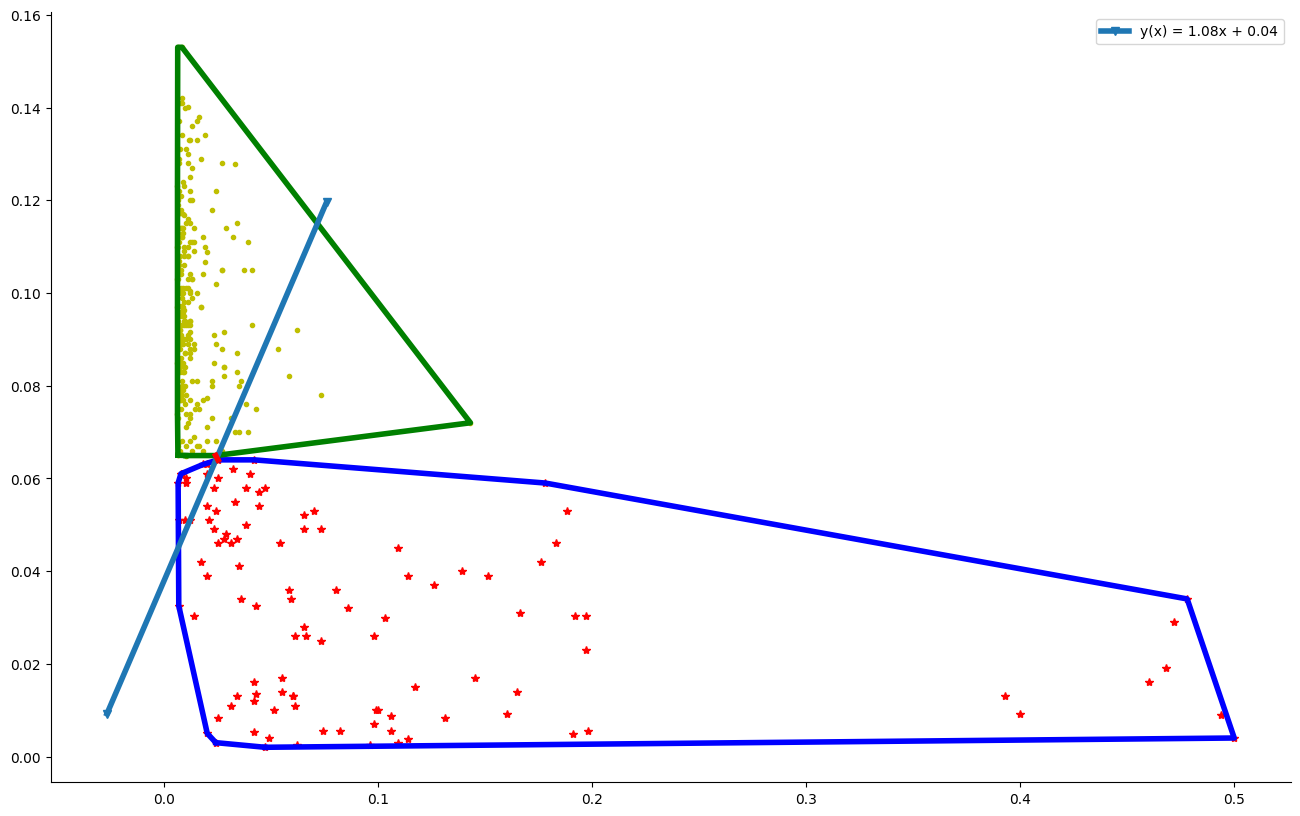

In [10]:
fig, ax = plt.subplots()
model, firstConvexHullIsLeft, params = plotModel(X_train, ax, filtro, Class, withNoise=False, modelAjust=0.05)

plt.legend(loc='upper right')

left = Class[0] if firstConvexHullIsLeft else Class[1]
right = Class[1] if firstConvexHullIsLeft else Class[0]

despine(ax)

plt.show()

#### Teste

##### Plot

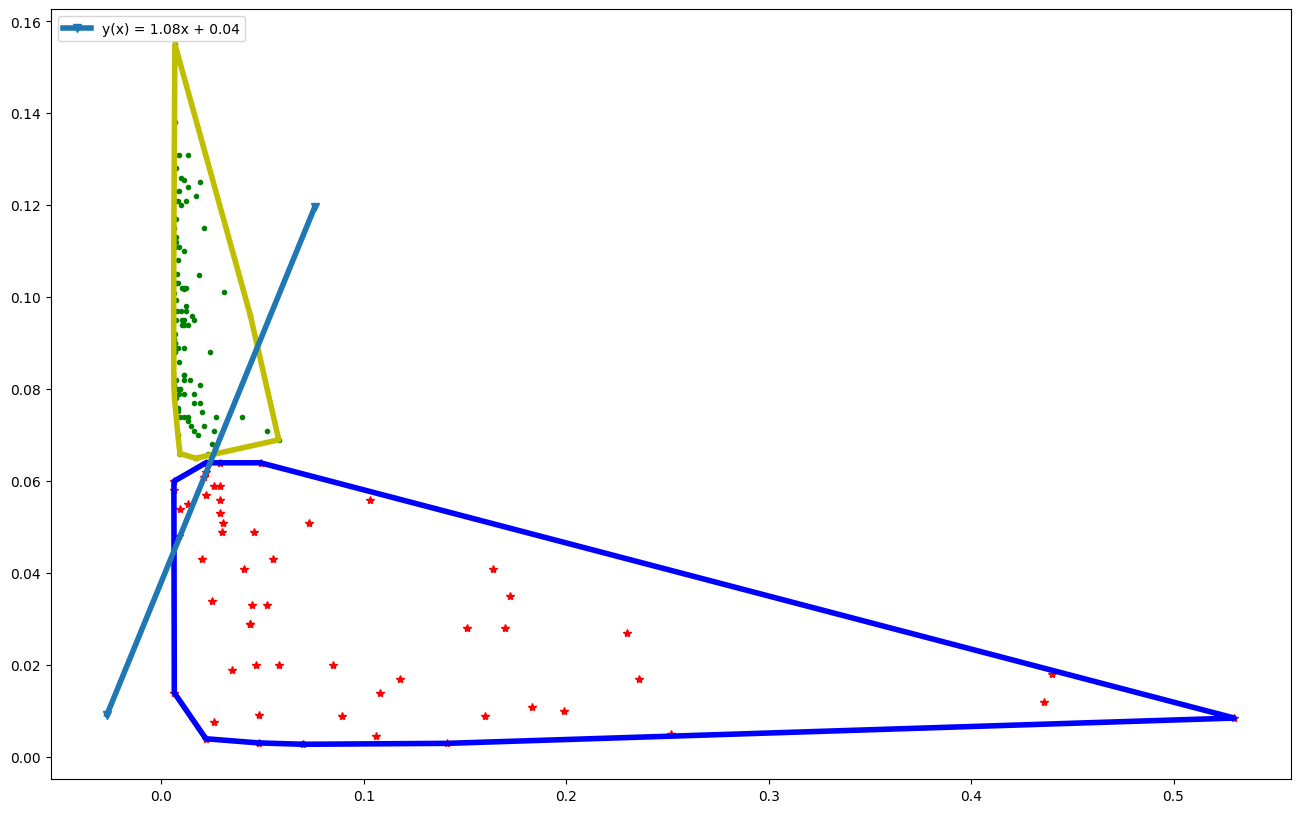

In [11]:
fig, ax = plt.subplots()

filtro = y_test == Class[0]
plotEnvoltorias(X_test, ax, filtro, Class, withNoise=False)
c, d = model
ax.plot([c.x, d.x], [c.y, d.y], 'v-', label=f'y(x) = {params[0]:.2f}x + {params[1]:.2f}')
ax.legend(loc="upper left")
plt.show()

##### Metricas

In [12]:
# Classificao Gerada Pelo Nosso Modelo
y_pred = classificacao(X_test, model=model, whoIsLeft=left, whoIsRight=right)

f1 = f1_score(y_test.values, y_pred, pos_label=Class[0])
accuracy = accuracy_score(y_test.values, y_pred) 
recall = recall_score(y_test.values, y_pred, pos_label=Class[0])
precision = precision_score(y_test.values, y_pred, pos_label=Class[0])

print(f'''\t Anilise das metricas
f1 score: {f1}
precision score: {precision} 
recall score: {recall}
accuracy_score: {accuracy}''')

	 Anilise das metricas
f1 score: 0.09638554216867469
precision score: 0.07272727272727272 
recall score: 0.14285714285714285
accuracy_score: 0.06832298136645963


### wine quality

#### Carrega o banco de dados

In [13]:
wine = pd.read_csv('data/winequality-white.csv', delimiter=',')

wine = wine[['CitricAcid', 'Alcohol', 'Quality']]

Class = [4, 8]

X_train, X_test, y_train, y_test = test_train(wine, 'Quality', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das Envoltorias

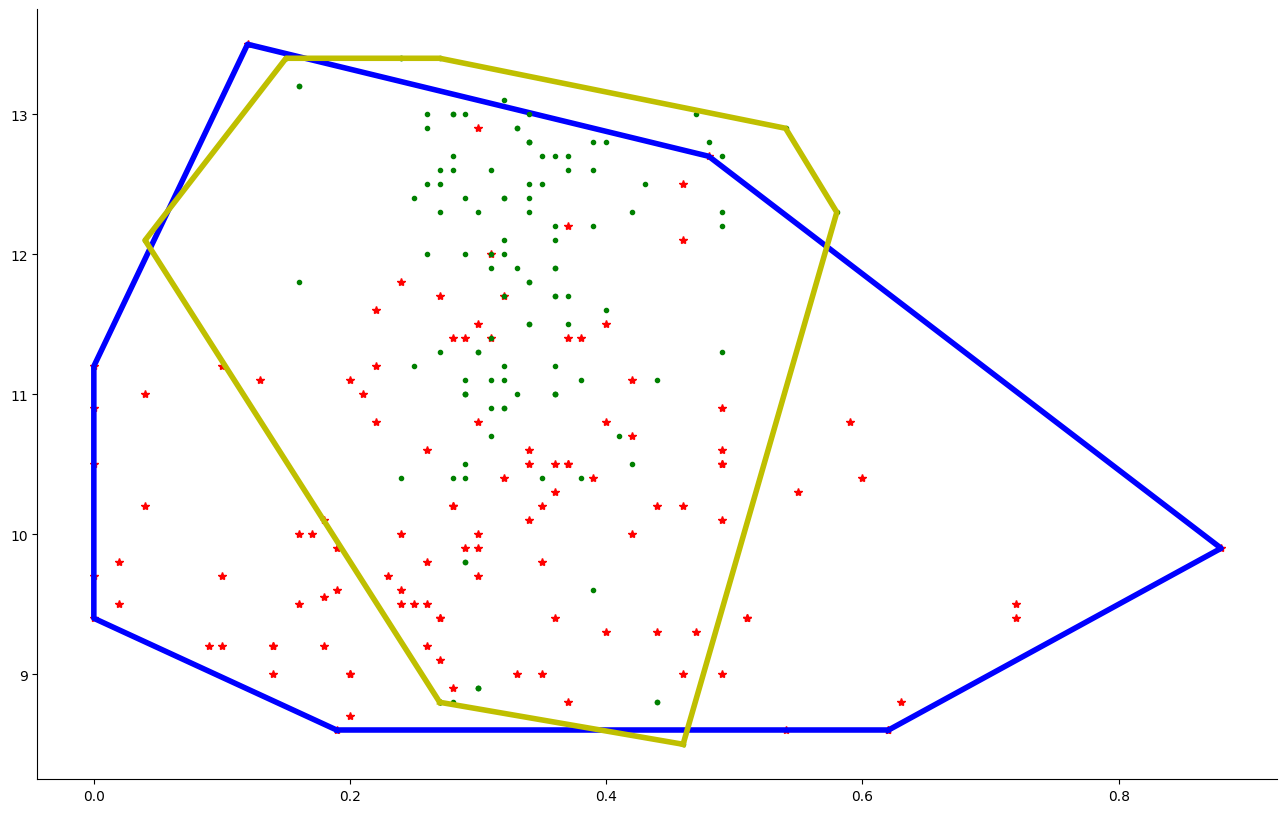

In [14]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=True)

despine(ax)

plt.show()

#### Analise de Separabilidade

In [15]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {hasIntersection}')

As envoltórias tem interssão: True


### Thyroid

#### Carrega o bando de dados e Separa em treino e teste

In [16]:
thyroid = pd.read_csv('./data/thyroid.csv', delimiter=',')
thyroid = thyroid[['TSH', 'FTI', 'Class']]

Class = [1, 2]

X_train, X_test, y_train, y_test = test_train(thyroid, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das envoltorias

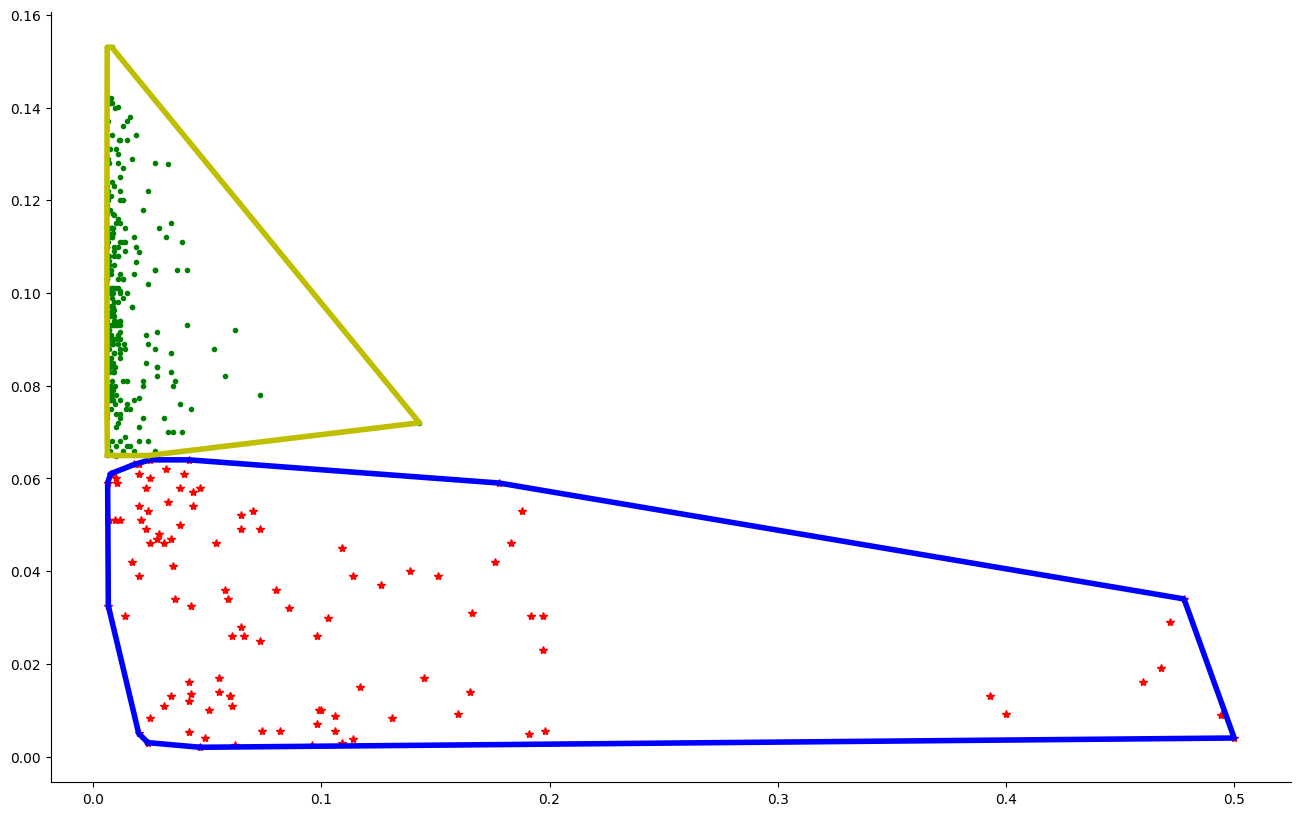

In [17]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)

despine(ax)

plt.show()

#### Analise de separabilidade

In [18]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {hasIntersection}')


As envoltórias tem interssão: False


#### Modelo

ValueError: too many values to unpack (expected 2)

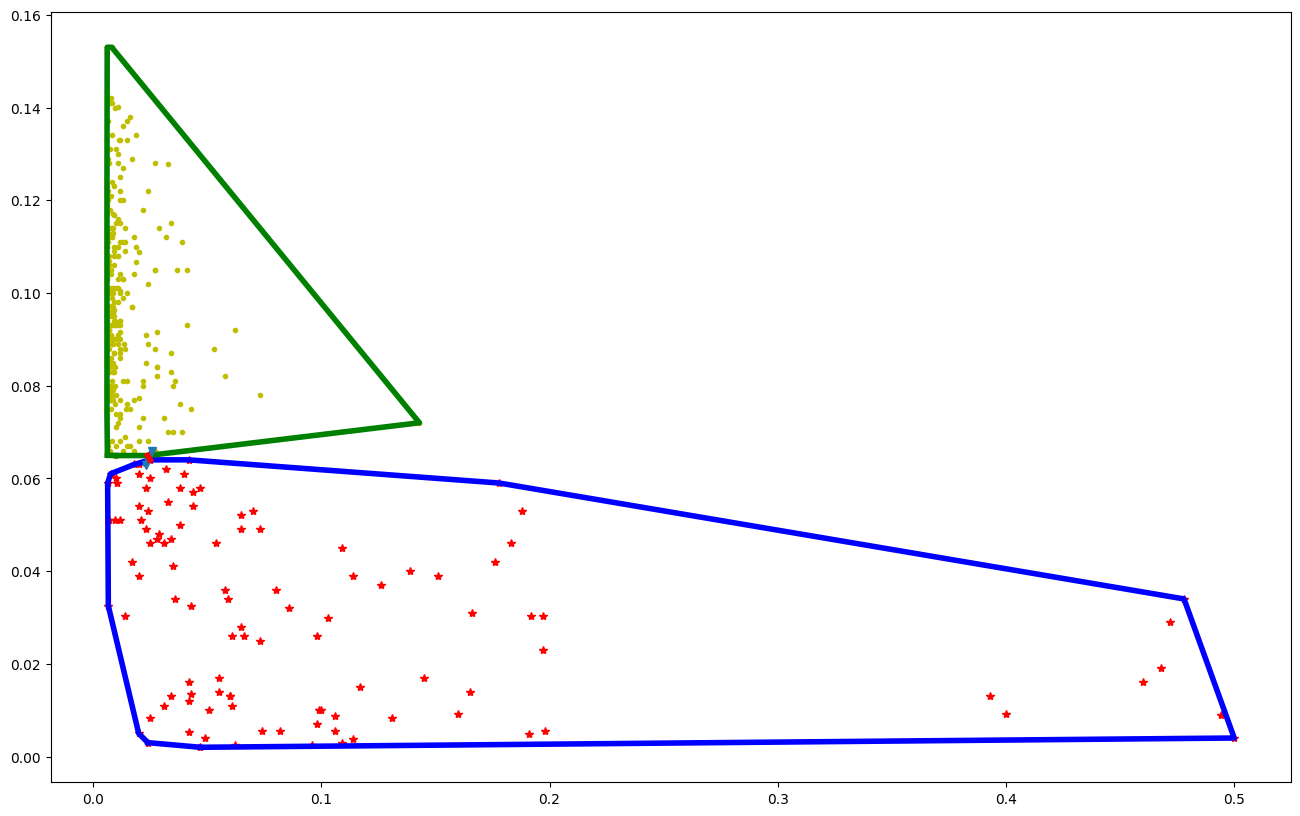

In [19]:
fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, Class, withNoise=False)

plt.legend(loc='upper left')

left = Class[0] if firstConvexHullIsLeft else Class[1]
right = Class[1] if firstConvexHullIsLeft else Class[0]

despine(ax)

plt.show()

#### Teste

##### Plot

In [ ]:
fig, ax = plt.subplots()

filtro = y_test == Class[0]
plotEnvoltorias(X_test, ax, filtro, Class, withNoise=False)
c, d = model
ax.plot([c.x, d.x], [c.y, d.y], 'v-', label=f'y(x) = {params[0]:.2f}x + {params[1]:.2f}')
ax.legend(loc="upper left")
plt.show()

##### Metricas

In [ ]:
# Classificao Gerada Pelo Nosso Modelo
y_pred = classificacao(X_test, model=model, whoIsLeft=left, whoIsRight=right)

f1 = f1_score(y_test.values, y_pred, pos_label=Class[0])
accuracy = accuracy_score(y_test.values, y_pred) 
recall = recall_score(y_test.values, y_pred, pos_label=Class[0])
precision = precision_score(y_test.values, y_pred, pos_label=Class[0])

print(f'''\t Anilise das metricas
f1 score: {f1}
precision score: {precision} 
recall score: {recall}
accuracy_score: {accuracy}''')

### Phoneme


#### Carrega o banco de dados

In [ ]:
phoneme = pd.read_csv('data/phoneme.csv', delimiter=',')
phoneme = phoneme[['Ao', 'Dcl', 'Class']]


Class = [0, 1]

X_train, X_test, y_train, y_test = test_train(phoneme, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das Envoltorias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=True)

despine(ax)

plt.show()

#### Analise de Separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')

### Breast Cancer Wisconsin

#### Carrega o banco de dados

In [ ]:
wdbc = pd.read_csv('data/wdbc.csv', delimiter=',')
wdbc = wdbc[['Radius1', 'Fractal_dimension1', 'Class']]


Class = ['M', 'B']

X_train, X_test, y_train, y_test = test_train(wdbc, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das Envoltorias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=True)

despine(ax)

plt.show()

#### Analise de Separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')

### Ionosphere

#### Carrega o banco de dados

In [ ]:
ionosphere = pd.read_csv('data/ionosphere.csv', delimiter=',')
ionosphere = ionosphere[['Pulse13', 'Pulse22', 'Class']]


Class = ['g', 'b']

X_train, X_test, y_train, y_test = test_train(ionosphere, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das Envoltorias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=True)

despine(ax)

plt.show()

#### Analise de Separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')

### movement_libras

#### Carrega o bando de dados e Separa em treino e teste

In [ ]:
movement_libras = pd.read_csv('./data/movement_libras.csv', delimiter=',')
movement_libras = movement_libras[['1st_coordinate_abcissa', '1st_coordinate_ordinate', 'Class']]

Class = [4, 11]

X_train, X_test, y_train, y_test = test_train(movement_libras, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das envoltorias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)

despine(ax)

plt.show()

#### Analise de separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')


#### Modelo

In [ ]:
fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, Class, withNoise=False)

left = Class[0] if firstConvexHullIsLeft else Class[1]
right = Class[1] if firstConvexHullIsLeft else Class[0]

plt.legend(loc='upper left')
despine(ax)

plt.show()

#### Teste

##### Plot

In [ ]:
fig, ax = plt.subplots()

filtro = y_test == Class[0]
plotEnvoltorias(X_test, ax, filtro, Class, withNoise=False)
c, d = model
ax.plot([c.x, d.x], [c.y, d.y], 'v-', label=f'y(x) = {params[0]:.2f}x + {params[1]:.2f}')
ax.legend(loc="upper left")
plt.show()

##### Metricas

In [ ]:
# Classificao Gerada Pelo Nosso Modelo
y_pred = classificacao(X_test, model=model, whoIsLeft=left, whoIsRight=right)

f1 = f1_score(y_test.values, y_pred, pos_label=Class[0])
accuracy = accuracy_score(y_test.values, y_pred) 
recall = recall_score(y_test.values, y_pred, pos_label=Class[0])
precision = precision_score(y_test.values, y_pred, pos_label=Class[0])

print(f'''\t Anilise das metricas
f1 score: {f1}
precision score: {precision} 
recall score: {recall}
accuracy_score: {accuracy}''')

### Shuttle

#### Carrega o bando de dados e Separa em treino e teste

In [ ]:
shuttle = pd.read_csv('./data/shuttle.csv', delimiter=',')
shuttle = shuttle[['A2', 'A7', 'Class']]

Class = [2, 6]

X_train, X_test, y_train, y_test = test_train(shuttle, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das envoltorias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)

despine(ax)

plt.show()

#### Analise de separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')


#### Classificação do Modelo com  os dados de treino

In [ ]:
fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, Class, withNoise=False)

left = Class[0] if firstConvexHullIsLeft else Class[1]
right = Class[1] if firstConvexHullIsLeft else Class[0]

plt.legend(loc='upper right')

despine(ax)

plt.show()

#### Teste

##### Plot

In [ ]:
fig, ax = plt.subplots()

filtro = y_test == Class[0]
plotEnvoltorias(X_test, ax, filtro, Class, withNoise=False)
c, d = model
ax.plot([c.x, d.x], [c.y, d.y], 'v-', label=f'y(x) = {params[0]:.2f}x + {params[1]:.2f}')
ax.legend(loc="upper left")
plt.show()

##### Metricas

In [ ]:
# Classificao Gerada Pelo Nosso Modelo
y_pred = classificacao(X_test, model=model, whoIsLeft=left, whoIsRight=right)

f1 = f1_score(y_test.values, y_pred, pos_label=Class[0])
accuracy = accuracy_score(y_test.values, y_pred) 
recall = recall_score(y_test.values, y_pred, pos_label=Class[0])
precision = precision_score(y_test.values, y_pred, pos_label=Class[0])

print(f'''\t Anilise das metricas
f1 score: {f1}
precision score: {precision} 
recall score: {recall}
accuracy_score: {accuracy}''')

### Texture

#### Carregando BD


In [ ]:
texture = pd.read_csv('./data/texture.csv', delimiter=',')
Class = [12, 14]

texture = texture[['A1', 'A40', 'Class']]

X_train, X_test, y_train, y_test = test_train(texture, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot Das Envoltórias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)

despine(ax)

plt.show()

#### Verificando Separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
sIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')


#### Modelo

In [ ]:
fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, Class, withNoise=False)

left = Class[0] if firstConvexHullIsLeft else Class[1]
right = Class[1] if firstConvexHullIsLeft else Class[0]

plt.legend(loc='upper left')
despine(ax)

plt.show()

#### Teste

##### Plot

In [ ]:
fig, ax = plt.subplots()

filtro = y_test == Class[0]
plotEnvoltorias(X_test, ax, filtro, Class, withNoise=False)
c, d = model
ax.plot([c.x, d.x], [c.y, d.y], 'v-', label=f'y(x) = {params[0]:.2f}x + {params[1]:.2f}')
ax.legend(loc="upper left")
plt.show()

##### Metricas

In [ ]:
# Classificao Gerada Pelo Nosso Modelo
y_pred = classificacao(X_test, model=model, whoIsLeft=left, whoIsRight=right)

f1 = f1_score(y_test.values, y_pred, pos_label=Class[0])
accuracy = accuracy_score(y_test.values, y_pred) 
recall = recall_score(y_test.values, y_pred, pos_label=Class[0])
precision = precision_score(y_test.values, y_pred, pos_label=Class[0])

print(f'''\t Anilise das metricas
f1 score: {f1}
precision score: {precision} 
recall score: {recall}
accuracy_score: {accuracy}''')

### Segment

#### Carrega o bando de dados e Separa em treino e teste

In [ ]:
segment = pd.read_csv('./data/segment.csv', delimiter=',')
segment = segment[['Intensity-mean', 'Hedge-mean', 'Class']]

Class = [1, 6]

X_train, X_test, y_train, y_test = test_train(segment, 'Class', Class[0], Class[1])

filtro = y_train == Class[0]

#### Plot das envoltorias

In [ ]:
fig, ax = plt.subplots()
dotList, envoltorias = plotEnvoltorias(X_train, ax, filtro, Class, withNoise=False)
plt.show()

#### Analise de separabilidade

In [ ]:
# Verifica se tem Interseção
endPointList, segmentsList = preProcessConvexHull(envoltorias[0], envoltorias[1])
hasIntersection = sweepLineIntersection(endPointList, segmentsList)

print(f'As envoltórias tem interssão: {"Sim" if hasIntersection else "Não"}')


#### Classificação do Modelo com os dados de Treino

In [ ]:
fig, ax = plt.subplots()
model, firstConvexHullIsLeft = plotModel(X_train, ax, filtro, Class, withNoise=False)

left = Class[0] if firstConvexHullIsLeft else Class[1]
right = Class[1] if firstConvexHullIsLeft else Class[0]

plt.legend(loc='upper left')
despine(ax)

plt.show()

#### Teste

##### Plot

In [ ]:
fig, ax = plt.subplots()

filtro = y_test == Class[0]
plotEnvoltorias(X_test, ax, filtro, Class, withNoise=False)
c, d = model
ax.plot([c.x, d.x], [c.y, d.y], 'v-', label=f'y(x) = {params[0]:.2f}x + {params[1]:.2f}')
ax.legend(loc="upper left")
plt.show()

##### Metricas

In [ ]:
# Classificao Gerada Pelo Nosso Modelo
y_pred = classificacao(X_test, model=model, whoIsLeft=left, whoIsRight=right)

f1 = f1_score(y_test.values, y_pred, pos_label=Class[0])
accuracy = accuracy_score(y_test.values, y_pred) 
recall = recall_score(y_test.values, y_pred, pos_label=Class[0])
precision = precision_score(y_test.values, y_pred, pos_label=Class[0])

print(f'''\t Anilise das metricas
f1 score: {f1}
precision score: {precision} 
recall score: {recall}
accuracy_score: {accuracy}''')